In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd


In [47]:
df_IMDB = pd.read_csv("C:\\AmaruAyelen\\proyectos\\PythonDataScienceMachineLearning\\PythonDataScienceMachineLearning\\bootcampIA\\LenguajeNatural\\IMDB Dataset.csv")
df_IMDB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
print(df_IMDB.columns)

Index(['review', 'sentiment'], dtype='object')


In [33]:
total_reviews = len(df_IMDB)
print(f'Número total de reseñas: {total_reviews}')

Número total de reseñas: 50000


In [34]:
# Contar el número de reseñas positivas y negativas
sentiment_counts = df_IMDB['sentiment'].value_counts()
print(f'Reseñas positivas: {sentiment_counts["positive"]}')
print(f'Reseñas negativas: {sentiment_counts["negative"]}')

Reseñas positivas: 25000
Reseñas negativas: 25000


In [35]:
# Calcular la proporción entre las negativas y las positivas
positive_proportion = sentiment_counts["positive"] / total_reviews
negative_proportion = sentiment_counts["negative"] / total_reviews

print(f'Proporción de reseñas positivas: {positive_proportion:.2%}')
print(f'Proporción de reseñas negativas: {negative_proportion:.2%}')

Proporción de reseñas positivas: 50.00%
Proporción de reseñas negativas: 50.00%


# Preprocesamiento de los datos

**Conversión a minúsculas**

In [51]:
# Convertir las reseñas a minúsculas
df_IMDB['review'] = df_IMDB['review'].str.lower()

# Ver las primeras filas para confirmar el cambio
print(df_IMDB.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive


**Eliminación de Etiquetas**

In [ ]:
import re

In [52]:
# Función para eliminar etiquetas HTML
def remove_html_tags(text):
    """Removes HTML tags from a string."""
    clean = re.sub(r'<[^>]+>', '', text)  # Expresión regular para eliminar etiquetas
    return clean

# Aplicar la función a la columna 'review'
df_IMDB['review'] = df_IMDB['review'].apply(remove_html_tags)

# Mostrar el DataFrame resultante
print(df_IMDB)

                                                  review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production. the filming tec...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically there's a family where a little boy ...  negative
4      petter mattei's "love in the time of money" is...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  i'm going to have to disagree with the previou...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]


**Eliminación signos de puntuación**

In [53]:
# Eliminar signos de puntuación
df_IMDB['review'] = df_IMDB['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Ver las primeras filas para confirmar el cambio
print(df_IMDB.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the filming tech...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


**Aplicación Stipwords**

In [12]:
pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------- -------------------- 20.5/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB 8.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 7.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 6.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.5 MB 5.4 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.5 MB 6.0 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/273.5 kB ? eta -:--:--
   -------- ---------------

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMARU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [54]:
# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Eliminar stopwords
df_IMDB['review'] = df_IMDB['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Ver las primeras filas para verificar el resultado
print(df_IMDB.head())

                                              review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically theres family little boy jake thinks...  negative
4  petter matteis love time money visually stunni...  positive


In [21]:
import spacy
#python -m spacy download en_core_web_sm

In [ ]:
# Stemming
from nltk.stem import PorterStemmer

In [55]:
# Crear el stemmer
stemmer = PorterStemmer()

# Aplicar stemming a cada palabra de la reseña
df_IMDB['review'] = df_IMDB['review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Verificar los cambios
print(df_IMDB.head())

                                              review sentiment
0  one review mention watch 1 oz episod youll hoo...  positive
1  wonder littl product film techniqu unassum old...  positive
2  thought wonder way spend time hot summer weeke...  positive
3  basic there famili littl boy jake think there ...  negative
4  petter mattei love time money visual stun film...  positive


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

In [56]:
# prompt: lematizacion del data set review usando nltk
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  """Lemmatizes a string."""
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply the function to your DataFrame's 'review' column:
df_IMDB['review'] = df_IMDB['review'].apply(lemmatize_text)

# Mostrar las primeras filas para verificar
print(df_IMDB.head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMARU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              review sentiment
0  one review mention watch 1 oz episod youll hoo...  positive
1  wonder littl product film techniqu unassum old...  positive
2  thought wonder way spend time hot summer weeke...  positive
3  basic there famili littl boy jake think there ...  negative
4  petter mattei love time money visual stun film...  positive


In [23]:
df_IMDB.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product br br film techniqu unass...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [139]:
# Crear el vectorizador con Bag of Words
vectorizer = CountVectorizer()

# Ajustar y transformar los datos
X_bow = vectorizer.fit_transform(df_IMDB['review'])

print(X_bow.shape)  # Cantidad de palabras diferentes que aparecen aunque sea una vez.

# Ver las características
print(vectorizer.get_feature_names_out())


(50000, 181770)
['00' '000' '0000000000001' ... 'þór' 'יגאל' 'כרמון']


In [135]:
# Ver la forma de la matriz (número de reseñas, número de palabras únicas)
print(f"Matriz BoW: {X_bow.shape}")

Matriz BoW: (50000, 181770)


In [160]:
# Mostrar las primeras palabras (características) que representan las columnas
print("Primeras palabras (columnas de la matriz BoW):")
bow_tokens = vectorizer.get_feature_names_out()[:-1000]
print(vectorizer.get_feature_names_out()[:-1000])  # Ver las primeras 10 palabras como ejemplo

Primeras palabras (columnas de la matriz BoW):
['00' '000' '0000000000001' ... 'yourseven' 'yoursi' 'yoursminu']


In [58]:
vectorizer.vocabulary_

{'one': 114761,
 'review': 133357,
 'mention': 101186,
 'watch': 173565,
 'oz': 117878,
 'episod': 52751,
 'youll': 180619,
 'hook': 76793,
 'right': 133971,
 'exactli': 54361,
 'happen': 71870,
 'meth': 101681,
 'first': 60167,
 'thing': 159911,
 'struck': 152974,
 'brutal': 24637,
 'unflinch': 168003,
 'scene': 138334,
 'violenc': 171740,
 'set': 142076,
 'word': 178017,
 'go': 67243,
 'trust': 165394,
 'show': 144062,
 'faint': 56348,
 'heart': 73183,
 'timid': 162109,
 'pull': 127985,
 'punch': 128059,
 'regard': 131572,
 'drug': 48076,
 'sex': 142304,
 'hardcor': 72151,
 'classic': 32313,
 'use': 169655,
 'wordit': 178032,
 'call': 26424,
 'nicknam': 110171,
 'given': 66906,
 'oswald': 116343,
 'maximum': 99546,
 'secur': 140278,
 'state': 150980,
 'penitentari': 120187,
 'focus': 61256,
 'mainli': 97098,
 'emerald': 51089,
 'citi': 32055,
 'experiment': 55209,
 'section': 140261,
 'prison': 126364,
 'cell': 28864,
 'glass': 67001,
 'front': 63476,
 'face': 55988,
 'inward': 82700

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)  # Ajusta según sea necesario

# Ajustar y transformar los datos
X_tfidf = tfidf_vectorizer.fit_transform(df_IMDB['review'])

# Ver las características
tfidf_tokens = tfidf_vectorizer.get_feature_names_out()
print(tfidf_vectorizer.get_feature_names_out())
print(X_tfidf.shape)  # Muestra la forma de la matriz TF-IDF

['007' '010' '10' ... 'zu' 'zucco' 'zucker']
(50000, 10000)


In [137]:
print(f"Matriz TF-IDF: {X_tfidf.shape}")

Matriz TF-IDF: (50000, 10000)


In [169]:
tfidf_vectorizer.vocabulary_

{'review': 7433,
 'mention': 5677,
 'watch': 9689,
 'oz': 6429,
 'episod': 3045,
 'youll': 9963,
 'hook': 4340,
 'right': 7482,
 'exactli': 3130,
 'happen': 4083,
 'meth': 5708,
 'thing': 8959,
 'struck': 8586,
 'brutal': 1264,
 'scene': 7746,
 'violenc': 9580,
 'set': 7903,
 'word': 9875,
 'trust': 9221,
 'faint': 3235,
 'heart': 4166,
 'timid': 9035,
 'pull': 7040,
 'punch': 7047,
 'regard': 7282,
 'drug': 2776,
 'sex': 7914,
 'hardcor': 4092,
 'classic': 1733,
 'use': 9451,
 'nicknam': 6116,
 'given': 3778,
 'maximum': 5603,
 'secur': 7832,
 'state': 8471,
 'focus': 3480,
 'mainli': 5473,
 'citi': 1716,
 'experiment': 3177,
 'section': 7831,
 'prison': 6942,
 'cell': 1531,
 'glass': 3786,
 'face': 3222,
 'high': 4248,
 'agenda': 341,
 'em': 2951,
 'home': 4319,
 'muslim': 5983,
 'gangsta': 3680,
 'latino': 5124,
 'christian': 1681,
 'italian': 4752,
 'irish': 4725,
 'death': 2332,
 'stare': 8460,
 'dodgi': 2670,
 'deal': 2325,
 'shadi': 7929,
 'agreement': 350,
 'far': 3262,
 'say':

In [152]:
first_4_docs = X_tfidf[:10].toarray()

result = pd.DataFrame(
    data=first_4_docs, 
    index=["Doc1", "Doc2", "Doc3", "Doc4", "Doc5", "Doc6", "Doc7", "Doc8", "Doc9", "Doc10"], 
    columns=tfidf_tokens
)

result

,007,010,10,100,1000,10000,101,1010,11,110,...,zoe,zoey,zombi,zone,zoo,zoom,zorro,zu,zucco,zucker
Doc1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc4,0.0,0.0,0.077963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.112414,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc7,0.0,0.0,0.100369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc10,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Importar las librerías
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
# X = df_IMDB['review']  # Reseñas
y = df_IMDB['sentiment']  # Etiquetas

In [70]:
# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 40000
Tamaño del conjunto de prueba: 10000


In [72]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# Hacer predicciones en los datos de prueba
y_pred = rf_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

Exactitud del modelo: 0.85


In [74]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {
    'n_estimators': [50, 200],  # Número de árboles
    'max_depth': [None, 20],  # Profundidad máxima
    'min_samples_split': [2, 5],  # Mínimo de muestras para dividir
    'min_samples_leaf': [1, 2]     # Mínimo de muestras en un nodo hoja
}

In [90]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=2, n_jobs=1, verbose=2)

In [91]:
# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  22.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  22.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  48.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  46.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  19.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  19.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  39.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  41.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  17.8s
[CV] END max_dept

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [95]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Mejores parámetros: {best_params}')
print(f'Mejora del puntaje: {best_score:.2f}')

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejora del puntaje: 0.84


## Cambio de Modelo

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [124]:
# Codificar las etiquetas 'positive' y 'negative' en 0 y 1
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [125]:
# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Capa de entrada con 128 unidades
model.add(Dense(64, activation='relu'))  # Capa oculta con 64 unidades
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

c:\Users\AMARU\anaconda3\envs\Python_DS_ML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [127]:
# Entrenar el modelo
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8366 - loss: 0.3803 - val_accuracy: 0.8803 - val_loss: 0.2806
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9290 - loss: 0.1852 - val_accuracy: 0.8789 - val_loss: 0.2828
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9575 - loss: 0.1133 - val_accuracy: 0.8757 - val_loss: 0.3571
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9875 - loss: 0.0383 - val_accuracy: 0.8739 - val_loss: 0.5424
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9982 - loss: 0.0079 - val_accuracy: 0.8767 - val_loss: 0.7294
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9997 - loss: 0.0026 - val_accuracy: 0.8743 - val_loss: 0.8912
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 1.0000 - loss: 6.9210e-04 - val_accuracy: 0.8751 - val_loss: 1.0104
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 1.00

In [128]:
# Hacer predicciones en los datos de prueba
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convertir las probabilidades en clases
print(y_pred_nn)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


In [130]:
# DataFrame para comparar predicciones con valores reales
comparison_df = pd.DataFrame({
    'Predicción': y_pred_nn.flatten(),  # Aplanar el array de predicciones
    'Valor Real': y_test_encoded
})
print(comparison_df.head(10))  # Cambia el número si quieres ver más filas

   Predicción  Valor Real
0           1           1
1           1           1
2           0           0
3           1           1
4           0           0
5           1           1
6           1           1
7           0           1
8           0           0
9           0           0


In [132]:
# Evaluar la precisión del modelo
accuracy_nn = accuracy_score(y_test_encoded, y_pred_nn)
precision_nn = precision_score(y_test_encoded, y_pred_nn)
recall_nn = recall_score(y_test_encoded, y_pred_nn)
f1_nn = f1_score(y_test_encoded, y_pred_nn)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_nn)

# Mostrar los resultados
print(f'Exactitud de la red neuronal: {accuracy_nn:.2f}')
print(f'Precisión de la red neuronal: {precision_nn:.2f}')
print(f'Recall de la red neuronal: {recall_nn:.2f}')
print(f'F1-Score de la red neuronal: {f1_nn:.2f}')


Exactitud de la red neuronal: 0.88
Precisión de la red neuronal: 0.87
Recall de la red neuronal: 0.89
F1-Score de la red neuronal: 0.88


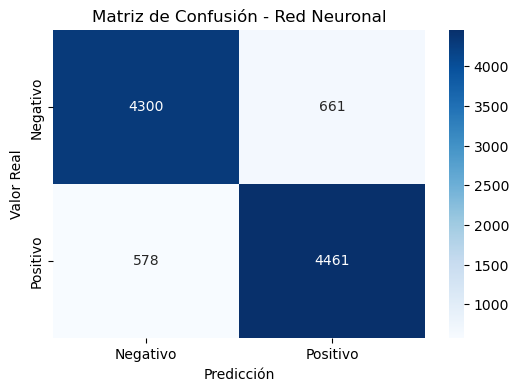

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Red Neuronal')
plt.show()